## To install
`pip3 install git+https://github.com/gtcanalytics/randl_client`

In [1]:
import randl_client

### Create an instance of the driver class

In [2]:
randl = randl_client.Randl()

# Set your provided API key here

In [21]:
randl.api_key = "your_api_key"

#### To check current Randl settings:

In [22]:
randl

URL:http://seismic-ai.com:8011/randl/
API Key:	your_api_key

-Bulletin-
Start:		2024-05-01T00:00:00
End:		2024-05-11T00:00:00
Stations:	100
Events:		1
Drop fraction:	0.2
Seed:	555

-Window-
Start:			2024-05-10 18:43:15.431390
Length:			1800
Min_phases:		5
Exclude associated:	False

-DML-
Models:		['pwave']
Sampling:	['full']
Num_samples:	10
Arids:		['None']
Pwave_model:	None
Baz_model:	None
Exclude stations:	True

-Beamsearch-
Beam width:	5
Max dist:	5000
Max time:	500
Sequence dist:	500
Sequence time:	500

## randl_client utility functions for scaling, unscaling, conversions, and constants used

In [25]:
randl_client.util.lonlat_to_geocentric(22, 15, 9)

(5713490.291534261, 2308399.918834397, 1640102.4695672975)

In [26]:
randl_client.util.geocentric_to_lonlat(5713490.291534261, 2308399.918834397, 1640102.4695672975)

(22.0, 14.999999999999995, 9.000000000931323)

In [27]:
randl_client.util.scale_time(65.2)

0.07244444444444445

In [28]:
randl_client.util.scale_geocentric(44444,33333,55555)

(0.0069681789525686405, 0.005226134214426453, 0.008710223690710828)

In [29]:
randl_client.util.unscale_geocentric(0.5, 0.2, 0.8)

(3189068.500000001, 1275627.4000000008, 5102509.6000000015)

In [30]:
randl_client.util.constants()

{'Earth radius': 6378.137}

### Octree surrogate model calls

In [31]:
# Note: Octree surrogate models expect a 2D array as input
inputs = [[0.15318064, -0.1910636 , -0.9663009 , -0.7103696 ,  0.49366274,    -0.28269523], [0.15328064, -0.1230636 , -0.9443009 , -0.7103696 ,  0.49366274,    -0.33369523]]

In [32]:
randl.taup_surrogate(inputs)

{'predictions': [0.7754557132720947, 0.7543653845787048]}

In [33]:
randl.baz_surrogate(inputs)

{'predictions': [-0.9549453854560852,
  -0.2548316717147827,
  -0.9923339486122131,
  -0.06697148084640503]}

In [35]:
### Analytical method

In [36]:
source_lat, source_lon = 34.05, -118.25  # Los Angeles, CA
st_lat, st_lon = 37.77, -122.42  # San Francisco, CA

randl.baz_geo_surrogate(source_lat, source_lon, st_lat, st_lon)

{'baz_cos': -0.7241238454468915, 'baz_sin': 0.6896699619783412}

### Randl Setter Functions
#### Bulletin Generator

`randl.set_bulletin_start('timestamp')`

`randl.set_bulletin_end('timestamp')`

`randl.set_bulletin_n_stations(int)`

`randl.set_bulletin_n_events(int)`

`randl.set_bulletin_drop_fraction(float)`

`randl.set_bulletin_seed(int)`

`bulletin = randl.create_bulletin()`

#### Windowing

`randl.set_window_start('timestamp')`

`randl.set_window_length(int)`

`randl.set_window_phases_required(int)`

`randl.set_window_exclude_associated_phases(Boolean)`

`window = randl.window_catalog(bulletin_dataframe)`

#### DML Predictions

`randl.set_dml_models(list).` Example: ['pwave', 'baz']

`randl.set_dml_sampling(list).` Example: ['kfn', 'knn', 'full', 'random']

`randl.set_dml_num_samples(int)`

`randl.set_dml_exclude_duplicate_stations(Boolean)`

`randl.set_dml_pwave_model("mlflow_model_path")`

`dml_predictions = randl.dml_prediction(window_dataframe)`

#### Beamsearch

`randl.set_beamwidth(int)`

`randl.set_beam_maxdist(int)`

`randl.set_beam_maxtime(int)`

`randl.set_beam_sequencedist(int)`

`randl.set_beam_sequencetimedist(int)`

`randl.beamsearch(window_dataframe, dml_predictions_dataframe)`

#### Octreee surrogate models
`randl.taup_surrogate([[float, float, float, float, float, float], ...])` 

`randl.baz_surrogate([[float, float, float, float, float, float], ...])` 

Both surrogate models require 2D arrays to be passed

`randl.baz_geo_surrogate(float, float, float, float)`


# Single event association example

In [37]:
# Creating a synthetic bulletin
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T2:30:00')
randl.set_bulletin_n_stations(100)
randl.set_bulletin_n_events(1)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(111)
bulletin = randl.create_bulletin()

In [38]:
bulletin

,STA,LAT_STA,LON_STA,ARID,TIME_ARRIV,IPHASE,ORID,ORIG_TIME,ORIG_LAT,ORIG_LON,ORIG_DEPTH,BACK_AZIMUTH
0,45,56.491988,-26.515362,1,2024-05-01 01:39:12.950928,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
1,30,57.099611,-55.173284,2,2024-05-01 01:39:12.950928,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
2,21,61.302537,-14.734537,4,2024-05-01 01:41:59.368804,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
3,89,77.001449,-72.801107,5,2024-05-01 01:43:17.067574,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
4,86,80.843328,-83.919966,7,2024-05-01 01:43:54.866036,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
5,22,56.737342,11.605741,9,2024-05-01 01:44:23.845864,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
6,23,88.371873,-53.174814,10,2024-05-01 01:44:32.805091,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
7,49,55.186389,-96.014403,11,2024-05-01 01:44:47.534542,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
8,34,89.725274,-168.548402,12,2024-05-01 01:44:48.308185,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0
9,51,84.016661,57.921130,13,2024-05-01 01:44:58.937686,P,0,2024-05-01 01:39:13.950928,60.980544,-40.249675,298.326817,0


### Obtaining initial DML model predictions

In [64]:
randl.set_window_start(bulletin.loc[0,"TIME_ARRIV"])
randl.set_window_length(2800)
randl.set_window_phases_required(5)
randl.set_window_exclude_associated_phases(False)
window = randl.window_catalog(bulletin)

randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['random'])
randl.set_dml_num_samples(50)
randl.set_dml_exclude_duplicate_stations(True)
dml_predictions = randl.dml_prediction(window)

In [65]:
dml_predictions

,ARID,STA,sampling,features,p_anchors,source_X_unscaled,source_Y_unscaled,source_Z_unscaled,Time_unscaled,source_X_scaled,...,DEPTH_ORIG,Loc_uncertainty,T_uncertainty,Loc_uncertainty_unscaled,T_uncertainty_unscaled,x_std,y_std,z_std,model,TIME_ORIG
0,"[12, 44, 28, 24, 13]","[34, 31, 78, 75, 51]",random,"[-0.0047152138000000005, -0.8035857816, -0.318...",2024-05-01 01:44:48.308185,2.509747e+06,-1.054609e+06,5.282657e+06,337.686521,0.393492,...,-4.183677e+05,0.956471,0.981143,277.633831,16.970891,0.045223,0.066646,0.018717,pwave,2024-05-01 01:39:10.621664185
1,"[2, 48, 16, 15, 28]","[30, 13, 44, 47, 78]",random,"[0.3109428018, -0.7685489293000001, -0.1990154...",2024-05-01 01:39:12.950928,1.870471e+06,-2.545741e+06,5.014524e+06,29.521998,0.293263,...,-4.361770e+05,0.961383,0.965978,246.306417,30.619491,0.042673,0.042836,0.030343,pwave,2024-05-01 01:38:43.428929609
2,"[14, 20, 22, 10, 9]","[10, 64, 94, 23, 22]",random,"[-0.0239908112, 0.8400323494, 0.8552468622, 0....",2024-05-01 01:44:23.845864,1.342074e+06,1.003099e+06,4.325287e+06,461.371064,0.210418,...,-1.721047e+06,0.786535,0.939185,1361.509713,54.733204,0.105889,0.426969,0.107538,pwave,2024-05-01 01:36:42.474799814
3,"[25, 48, 16, 15, 5]","[20, 13, 44, 47, 89]",random,"[0.3972390523, -0.7685489293000001, -0.1990154...",2024-05-01 01:43:17.067574,1.397891e+06,-1.247370e+06,5.738434e+06,183.303693,0.219169,...,-3.222749e+05,0.947973,0.971473,331.832756,25.674624,0.056421,0.068730,0.030929,pwave,2024-05-01 01:40:13.763881063
4,"[22, 20, 40, 11, 26]","[94, 64, 96, 49, 93]",random,"[0.8552468622, 0.8400323494, -0.7408243482, -0...",2024-05-01 01:44:47.534542,2.288479e+06,-1.701713e+06,5.198071e+06,347.781792,0.358800,...,-4.326903e+05,0.971843,0.983052,179.591612,15.252973,0.025306,0.039059,0.020107,pwave,2024-05-01 01:38:59.752749717
5,"[35, 46, 40, 21, 2]","[66, 0, 96, 14, 30]",random,"[-0.6649075694000001, -0.8749148131000001, -0....",2024-05-01 01:39:12.950928,1.737411e+06,-2.499878e+06,5.482507e+06,13.511402,0.272401,...,-9.073794e+04,0.963955,0.969574,229.900138,27.383780,0.040123,0.042971,0.025041,pwave,2024-05-01 01:38:59.439526399
6,"[16, 14, 40, 9, 29]","[44, 10, 96, 22, 99]",random,"[-0.1990154617, -0.0239908112, -0.7408243482, ...",2024-05-01 01:44:23.845864,2.096228e+06,-1.722138e+06,5.315299e+06,306.890416,0.328658,...,-3.935453e+05,0.958942,0.962670,261.872410,33.597032,0.037365,0.053903,0.031905,pwave,2024-05-01 01:39:16.955447855
7,"[10, 40, 23, 34, 1]","[23, 96, 39, 76, 45]",random,"[0.017086909, -0.7408243482, -0.15395534430000...",2024-05-01 01:39:12.950928,2.737623e+06,-1.718151e+06,5.233352e+06,57.641637,0.429220,...,-2.116517e+05,0.971530,0.973285,181.588722,24.043623,0.026410,0.032261,0.026740,pwave,2024-05-01 01:38:15.309290675
8,"[27, 49, 17, 25, 10]","[90, 67, 71, 20, 23]",random,"[0.039695360400000004, -0.7379833928, -0.03805...",2024-05-01 01:44:32.805091,1.536716e+06,-9.290274e+05,5.762390e+06,242.358720,0.240935,...,-3.229321e+05,0.938220,0.957018,394.039748,38.683422,0.069657,0.081713,0.033969,pwave,2024-05-01 01:40:30.446370697
9,"[16, 21, 37, 49, 2]","[44, 14, 3, 67, 30]",random,"[-0.1990154617, 0.6525258719, -0.6541803599, -...",2024-05-01 01:39:12.950928,1.706586e+06,-2.532884e+06,5.474322e+06,13.191858,0.267568,...,-9.314505e+04,0.965425,0.977560,220.524113,20.196109,0.036244,0.045630,0.021851,pwave,2024-05-01 01:38:59.759069693


### Obtaining Beamsearch prediction

In [66]:
randl.set_beamwidth(30)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(100)
randl.set_beam_sequencedist(300)
randl.set_beam_sequencetimedist(100)
beam_result = randl.beamsearch(window, dml_predictions)

In [67]:
beam_result

{'scaled_centroid': [0.3125885948625, -0.20721500553750002, 0.8422697708],
 'unscaled_centroid': [-33.54040121863043,
  66.15255059205815,
  -479686.93967079185],
 'time': '2024-05-01T01:39:42.962210',
 'score': 0.6306645293320853,
 'used_arids': [1,
  2,
  4,
  5,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  34,
  35,
  37,
  39,
  40,
  44,
  45,
  46,
  47,
  48,
  49]}

### Plotting results

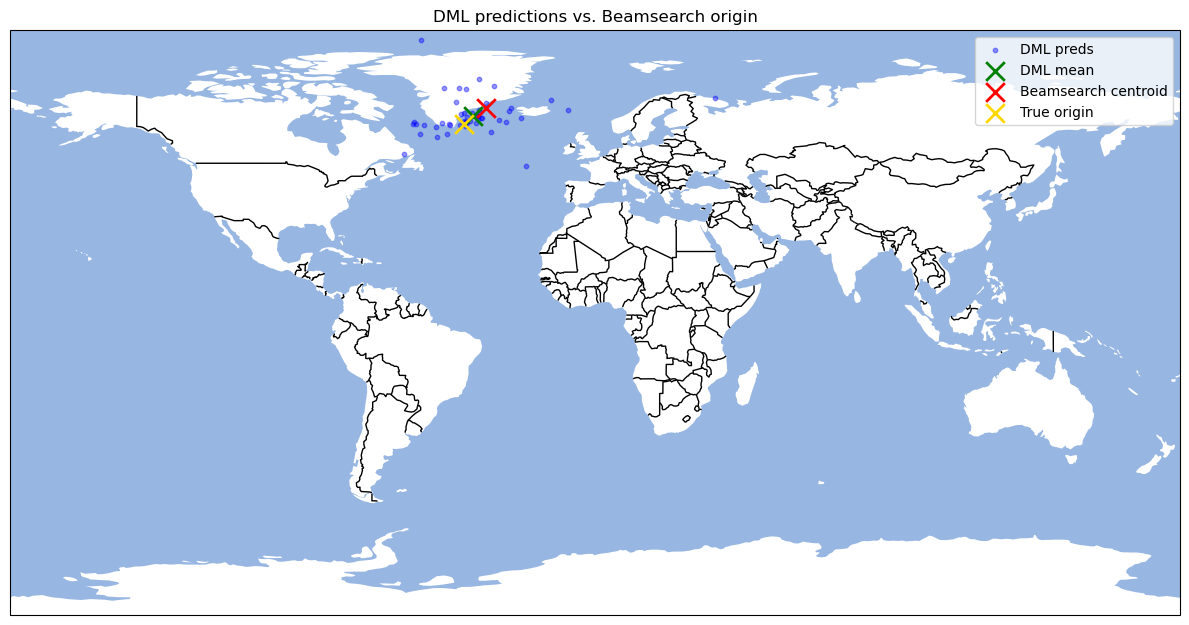

origin lat:     60.9805442979
dml_mean  lat:  63.607584746134
beamsearch lat: 66.15255059205815
origin lon:     -40.2496747424
dml_mean  lon:  -37.39040835965
beamsearch lon: -33.54040121863043


In [68]:
import matplotlib.pyplot as plt
from statistics import mean
import cartopy
from dateutil import parser

origin_time = bulletin.loc[0,"ORIG_TIME"]
origin_lon = bulletin.loc[0,"ORIG_LON"]
origin_lat = bulletin.loc[0,"ORIG_LAT"]
dml_lat_mean = mean(dml_predictions.LAT_ORIG)
dml_lon_mean = mean(dml_predictions.LON_ORIG)
beamsearch_lon = beam_result['unscaled_centroid'][0]

beamsearch_lat = beam_result['unscaled_centroid'][1]
beamsearch_time = parser.parse(beam_result['time'])

plt.rcParams['figure.figsize'] = [12,12]
geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(dml_predictions['LON_ORIG'], dml_predictions['LAT_ORIG'], marker='.', s=40, linewidth=1, c='b', alpha=0.4, label="DML preds")
geo_axes.scatter(dml_lon_mean, dml_lat_mean, marker='x', linewidth=2, c='g', s=180, alpha=1, label="DML mean")
geo_axes.scatter(beamsearch_lon, beamsearch_lat, marker='x', linewidth=2, c='r', s=180, alpha=1, label="Beamsearch centroid")
geo_axes.scatter(origin_lon, origin_lat, marker='x', linewidth=2, c='gold', s=180, alpha=1, label="True origin")
geo_axes.set_global()

plt.title("DML predictions vs. Beamsearch origin")
plt.legend()
plt.tight_layout()
plt.show()

print("origin lat:    ", origin_lat)
print("dml_mean  lat: ", dml_lat_mean)
print("beamsearch lat:", beamsearch_lat)

print("origin lon:    ", origin_lon)
print("dml_mean  lon: ", dml_lon_mean)
print("beamsearch lon:", beamsearch_lon)

# Full bulletin association
### 6 hour bulletin with 6 events from 50 stations

In [69]:
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T6:00:00')
randl.set_bulletin_n_stations(50)
randl.set_bulletin_n_events(6)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(23)
bulletin = randl.create_bulletin()

### Setting parameters

In [70]:
randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['random'])
randl.set_dml_num_samples(60)
randl.set_dml_exclude_duplicate_stations(True)

randl.set_beamwidth(5)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(100)
randl.set_beam_sequencedist(300)
randl.set_beam_sequencetimedist(100)

### Full association

In [71]:
origins = randl.associate_bulletin(bulletin, travel_time=600, verbose=False)
origins

Error: 500 Internal Server Error
Expecting value: line 1 column 1 (char 0)
10 origins found in bulletin.


,Window_start,Window_end,DML_mean_lat,DML_mean_lon,Beamsearch_lat,Beamsearch_lon,Beamsearch_time,associated_arids,Beamsearch_score,Beamsearch_elev,Beamsearch_x,Beamsearch_y,Beamsearch_z
0,2024-05-01 00:06:31.013949,2024-05-01 00:13:18.201445,19.050802,163.11799,19.201442,163.602154,2024-05-01 00:01:48.759466,"[0, 2, 3, 4, 5, 8, 9, 10, 11, 12, 16, 18, 20, 21]",0.735788,-392564.684915,-0.850524,0.250288,0.306564
1,2024-05-01 00:08:13.190378,2024-05-01 00:12:01.429847,18.086782,162.353682,17.568944,163.142871,2024-05-01 00:01:29.461112,"[1, 17, 6, 13, 14, 15]",0.959718,-375047.345470,-0.859018,0.260288,0.282174
2,2024-05-01 00:48:50.674070,2024-05-01 00:58:20.413238,83.517651,149.460115,83.764678,148.436301,2024-05-01 00:46:40.463530,"[65, 66, 68, 69, 71, 48, 52, 53, 57, 58, 59, 6...",0.964723,-393934.147653,-0.087136,0.053530,0.929314
3,2024-05-01 01:28:52.682535,2024-05-01 01:38:22.002660,-65.426816,38.428221,-62.695461,37.219295,2024-05-01 01:26:12.900474,"[98, 100, 103, 105, 108, 110, 87, 88, 91, 92, ...",0.961327,-518209.085822,0.336581,0.255658,-0.812779
4,2024-05-01 01:46:26.266947,2024-05-01 01:56:04.172749,31.243027,-152.222614,34.496274,-152.651705,2024-05-01 01:46:24.126064,"[131, 133, 134, 136, 138, 139, 140, 141, 122, ...",0.937748,-395781.696461,-0.687408,-0.355532,0.528022
5,2024-05-01 01:52:58.933690,2024-05-01 01:58:47.869076,35.305162,-144.771253,37.264116,-150.14597,2024-05-01 01:46:28.516065,"[132, 135, 142, 143, 144, 145, 146, 147, 148, ...",0.959482,-391116.333301,-0.648762,-0.372363,0.565047
6,2024-05-01 03:30:43.916399,2024-05-01 03:37:03.315198,30.512887,8.699715,27.580301,7.22124,2024-05-01 03:24:46.138416,"[193, 195, 196, 175, 176, 177, 178, 179, 180, ...",0.959854,-325327.316369,0.835112,0.105814,0.436607
7,2024-05-01 03:35:07.920198,2024-05-01 03:36:26.496878,36.064618,14.685001,29.07794,10.199744,2024-05-01 03:25:34.533916,"[192, 194, 183, 186, 187, 191]",0.912179,-559915.426932,0.785319,0.141298,0.440463
8,2024-05-01 03:54:53.660200,2024-05-01 04:03:53.460103,6.793611,123.330048,4.909403,125.078269,2024-05-01 03:51:37.100100,"[225, 227, 228, 229, 230, 234, 212, 213, 214, ...",0.958737,-275809.804010,-0.547840,0.780127,0.081309
9,2024-05-01 03:54:53.660200,2024-05-01 04:03:53.460103,7.999718,127.696458,5.643322,126.231853,2024-05-01 03:51:37.320381,"[226, 211, 231, 232, 233, 235]",0.95177,-247360.664941,-0.565397,0.771617,0.093867


### Removing low scoring origins

In [72]:
origins_trimmed = origins[origins.Beamsearch_score > 0.9]

### Plotting results

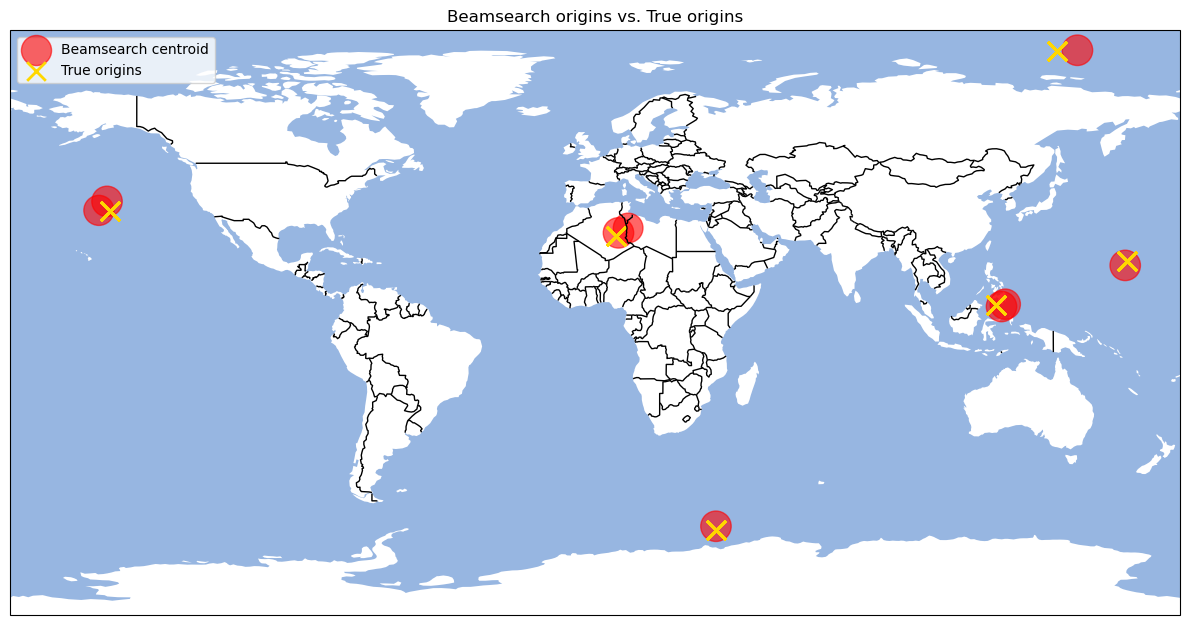

In [74]:
plt.rcParams['figure.figsize'] = [12,12]

beam_sizes = [x*500 for x in origins_trimmed.Beamsearch_score.tolist()]

geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(origins_trimmed.Beamsearch_lon, origins_trimmed.Beamsearch_lat, c='r', s=beam_sizes, alpha=0.6, label="Beamsearch centroid")
geo_axes.scatter(bulletin.ORIG_LON, bulletin.ORIG_LAT, marker='x', linewidth=2, c='gold', s=180, alpha=1, label="True origins")
geo_axes.set_global()

plt.title("Beamsearch origins vs. True origins")
plt.legend()
plt.tight_layout()
plt.show()

### Full association of 10 hour bulletin with 10 events from 100 stations

In [75]:
randl.set_bulletin_start('2024-05-01T00:00:00')
randl.set_bulletin_end('2024-05-01T10:00:00')
randl.set_bulletin_n_stations(100)
randl.set_bulletin_n_events(10)
randl.set_bulletin_drop_fraction(0.2)
randl.set_bulletin_seed(23)
bulletin = randl.create_bulletin()

In [76]:
randl.set_dml_models(['pwave'])
randl.set_dml_sampling(['random'])
randl.set_dml_num_samples(50)
randl.set_dml_exclude_duplicate_stations(True)

randl.set_beamwidth(5)
randl.set_beam_maxdist(1000)
randl.set_beam_maxtime(180)
randl.set_beam_sequencedist(400)
randl.set_beam_sequencetimedist(180)

In [77]:
origins = randl.associate_bulletin(bulletin, exclude_associated_phases=True, travel_time=600, verbose=False)

Error: 500 Internal Server Error
Expecting value: line 1 column 1 (char 0)
25 origins found in bulletin.


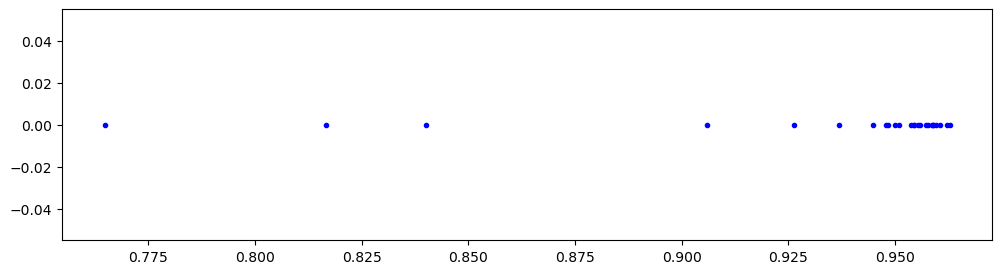

In [78]:
import numpy as np
plt.rcParams['figure.figsize'] = [12,3]
plt.plot(origins.Beamsearch_score, np.zeros(len(origins)), '.', color='b')
plt.show()

### Plotting results (with applied score threshold)

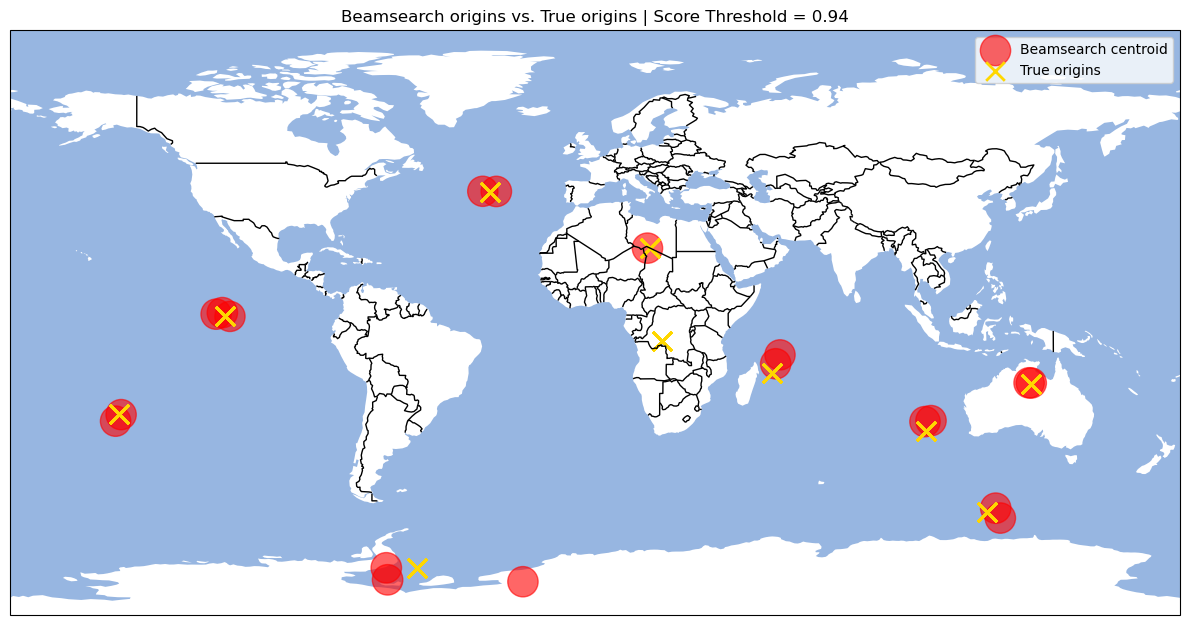

19


In [79]:
threshold = 0.94

origins_trimmed = origins[origins.Beamsearch_score > threshold]


plt.rcParams['figure.figsize'] = [12,12]

beam_sizes = [x*500 for x in origins_trimmed.Beamsearch_score.tolist()]

geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())
geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.OCEAN)
geo_axes.scatter(origins_trimmed.Beamsearch_lon, origins_trimmed.Beamsearch_lat, c='r', s=beam_sizes, alpha=0.6, label="Beamsearch centroid")
geo_axes.scatter(bulletin.ORIG_LON, bulletin.ORIG_LAT, marker='x', linewidth=2, c='gold', s=180, alpha=1, label="True origins")
geo_axes.set_global()

plt.title("Beamsearch origins vs. True origins | Score Threshold = " + str(threshold))
plt.legend()
plt.tight_layout()
plt.show()
print(len(origins_trimmed))

### Checking predicted origin times from beamsearch against true origin times

In [80]:
import pandas as pd
import numpy as np
import datetime

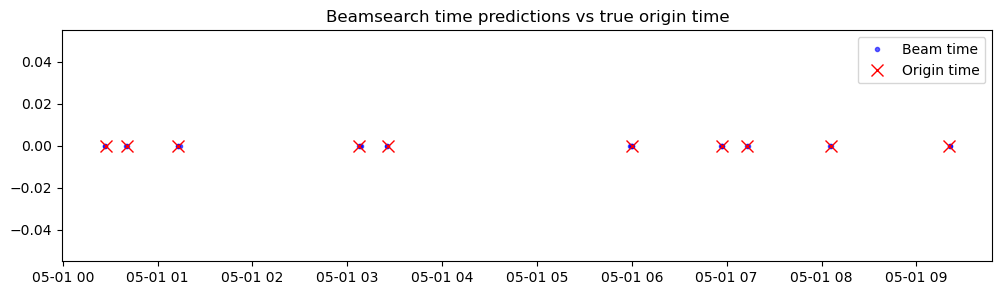

In [81]:
origin_times = pd.to_datetime(bulletin.ORIG_TIME.unique())
beam_times = pd.to_datetime(origins.Beamsearch_time)

plt.rcParams['figure.figsize'] = [12,3]
plt.plot(beam_times, np.zeros(len(beam_times)), '.', color='b', label='Beam time', alpha=0.6)
plt.plot(origin_times, np.zeros(len(origin_times)), 'x', color='r', markersize=9, label='Origin time')
plt.legend()
plt.title("Beamsearch time predictions vs true origin time")

plt.show()